In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from keras import models
from keras import layers
from keras.preprocessing.text import Tokenizer

In [33]:
from keras.datasets import imdb

In [78]:
from IPython.display import Image, SVG
from IPython.core.display import HTML 

**IMDB movie review sentiment classification dataset.**

This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data.

In [46]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=1000)

In [47]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


In [48]:
X_train[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189,

### Tokenizer

This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf...

In [49]:
tokenizer = Tokenizer(num_words=1000)
features_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(X_test, mode='binary')

**sequences_to_matrix()**

Converts a list of sequences into a Numpy matrix.

sequences - list of sequences (a sequence is a list of integer word indices).

In [50]:
features_train[0].shape

(1000,)

In [51]:
features_train[0][:20]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [60]:
network = models.Sequential()

In [61]:
network.add(layers.Dense(units=16, activation='relu', input_shape=(1000,)))

In [62]:
network.add(layers.Dense(units=16, activation='relu'))

In [63]:
network.add(layers.Dense(units=1, activation='sigmoid'))

There we add 3 layers to our network. Two of them are hidden and the last one for output. For hidden layers we used ReLU activation function and for the output node we used sigmoid funtion.

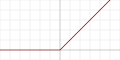

In [82]:
Image(filename ="img\ReLU_activation_func.png", width=300, height=300)

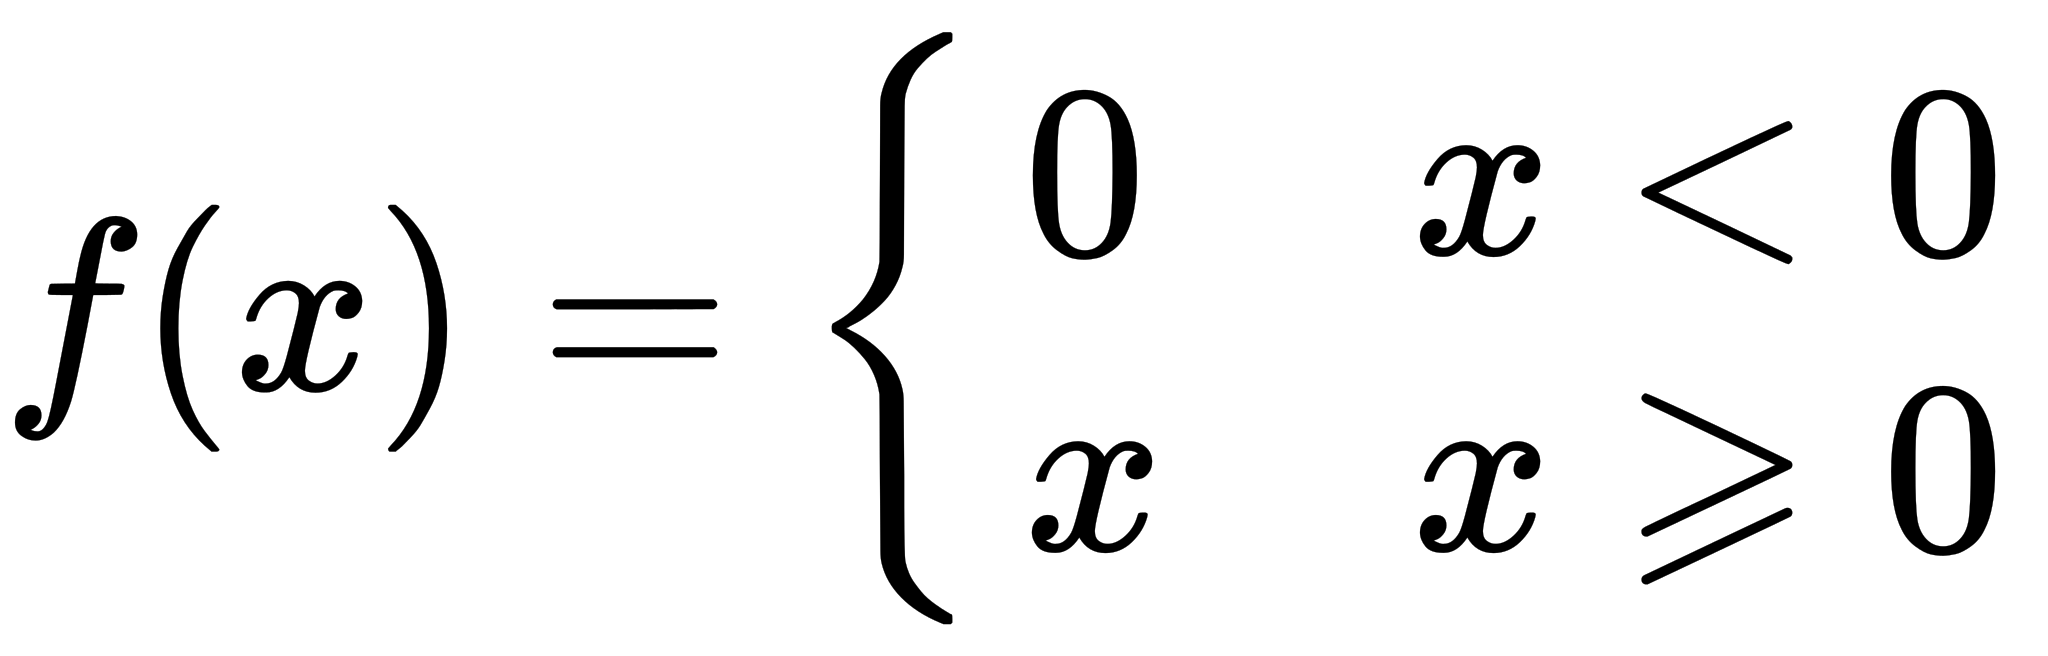

In [83]:
display(SVG(filename='img\ReLU_formula.svg'))

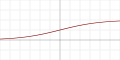

In [85]:
Image(filename ="img\sigmoid_activation_fun.png", width=300, height=300)

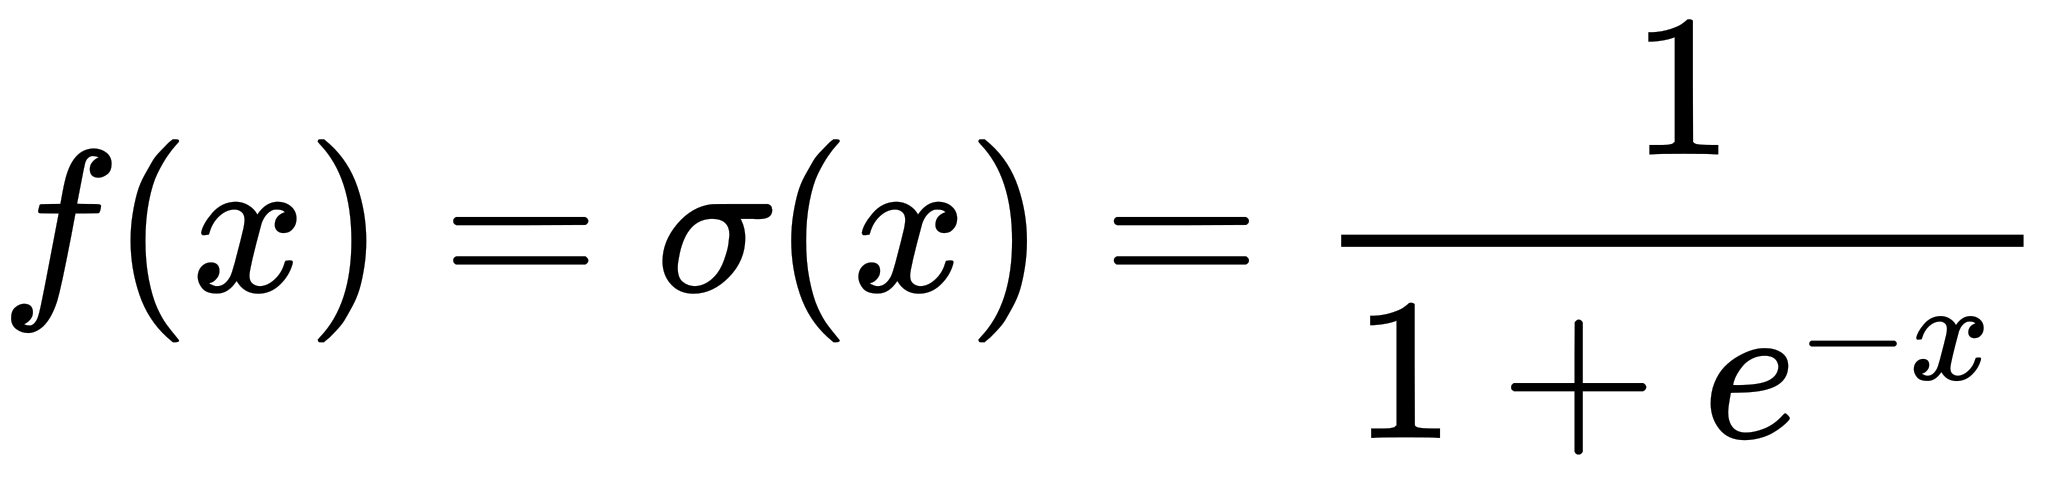

In [86]:
display(SVG(filename='img\sigmoid_formula.svg'))

In [64]:
network.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [81]:
history = network.fit(
    features_train,
    y_train,
    epochs=3,
    verbose=1,
    batch_size=100,
    validation_data=(features_test, y_test)
)

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 1s 48us/step - loss: 0.0156 - accuracy: 0.9964 - val_loss: 1.5324 - val_accuracy: 0.8146
Epoch 2/3
25000/25000 [==============================] - 1s 48us/step - loss: 0.0139 - accuracy: 0.9976 - val_loss: 1.5876 - val_accuracy: 0.8120
Epoch 3/3
25000/25000 [==============================] - 1s 49us/step - loss: 0.0123 - accuracy: 0.9976 - val_loss: 1.7254 - val_accuracy: 0.8154
